[[-1. -1. -1.  1.]
 [ 1. -1. -1.  1.]
 [ 1.  1. -1.  1.]
 [-1.  1. -1.  1.]
 [-1. -1.  1.  1.]
 [ 1. -1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1.  1.  1.  1.]
 [ 2. -1.  0.  1.]
 [ 2.  1.  0.  1.]]
[-1. -1. -1.  1.]
[-4.414 -0.5    2.   ]
[ 1. -1. -1.  1.]
[-3.    -1.914  2.   ]
[ 1.  1. -1.  1.]
[-1.586 -0.5    2.   ]
[-1.  1. -1.  1.]
[-3.     0.914  2.   ]
[-1. -1.  1.  1.]
[-4.414 -0.5    4.   ]
[ 1. -1.  1.  1.]
[-3.    -1.914  4.   ]
[1. 1. 1. 1.]
[-1.586 -0.5    4.   ]
[-1.  1.  1.  1.]
[-3.     0.914  4.   ]
[ 2. -1.  0.  1.]
[-2.293 -2.621  3.   ]
[2. 1. 0. 1.]
[-0.879 -1.207  3.   ]


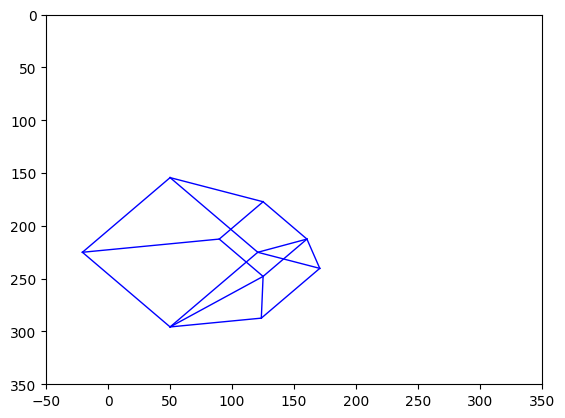

In [4]:
#PROBLEM 2

#First cTw, K, and the matrix of vertices is declared.
#Then we get a matrix of projected vertices by taking each vertex and doing K * cTw * vertex
#Once we have this, we can declare the edges between each vertex and draw them using Line2D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cTw = np.array([
    [0.707, 0.707, 0, -3],
    [-0.707, 0.707, 0, -0.5],
    [0, 0, 1, 3]
])

K = np.array([
    [100, 0, 200],
    [0, -100, 200],
    [0, 0, 1]
])

vertices = np.array([
    [-0.5, -0.5, -0.5, 1],  
    [0.5, -0.5, -0.5, 1],   
    [0.5, 0.5, -0.5, 1],    
    [-0.5, 0.5, -0.5, 1],    
    [-0.5, -0.5, 0.5, 1],   
    [0.5, -0.5, 0.5, 1],    
    [0.5, 0.5, 0.5, 1],    
    [-0.5, 0.5, 0.5, 1],    
    [1, -0.5, 0, 1],
    [1, 0.5, 0, 1]
])

vertices[:, :3] *= 2
print(vertices)
projected_vertices = []
for vertex in vertices:
    print (vertex)
    P_c = np.dot(cTw, vertex)
    print(P_c)  
    p = np.dot(K, P_c) 
    p /= p[2]  
    projected_vertices.append(p[:2]) 

projected_vertices = np.array(projected_vertices)

fig, ax = plt.subplots()
ax.set_xlim(-50, 350)
ax.set_ylim(0, 350)

edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  
    (4, 5), (5, 6), (6, 7), (7, 4),  
    (0, 4), (1, 5), (2, 6), (3, 7),   
    (1, 8), (5, 8), (2, 9), (6, 9), (8,9)
]

for edge in edges:
    line = Line2D(
        [projected_vertices[edge[0]][0], projected_vertices[edge[1]][0]],
        [projected_vertices[edge[0]][1], projected_vertices[edge[1]][1]],
        linewidth=1, color='blue'
    )
    ax.add_line(line)

plt.gca().invert_yaxis()  
plt.show()


In [5]:
#PROBLEM 3

# To get the location of the camera with respect to the world frame, the cRw matrix and the ctw matrices have
# to be taken out of the cTw matrix. Then inverting the rotation matrix and multiplying it by the negative 
# translation vector will give us the desired result.

cRw = cTw[:, :3]
print(cRw)
ctw = cTw[:, 3]
print(ctw)

cRw_T = cRw.T
print(cRw_T)

inverse_translation = -np.dot(cRw_T, ctw)

camera_position = inverse_translation

print("Camera Position in World Coordinates:", camera_position)


[[ 0.707  0.707  0.   ]
 [-0.707  0.707  0.   ]
 [ 0.     0.     1.   ]]
[-3.  -0.5  3. ]
[[ 0.707 -0.707  0.   ]
 [ 0.707  0.707  0.   ]
 [ 0.     0.     1.   ]]
Camera Position in World Coordinates: [ 1.7675  2.4745 -3.    ]


[[-1. -1. -1.  1.]
 [ 1. -1. -1.  1.]
 [ 1.  1. -1.  1.]
 [-1.  1. -1.  1.]
 [-1. -1.  1.  1.]
 [ 1. -1.  1.  1.]
 [ 1.  1.  1.  1.]
 [-1.  1.  1.  1.]
 [ 2. -1.  0.  1.]
 [ 2.  1.  0.  1.]]
[-1. -1. -1.  1.]
[-3.  1. -4.]
[ 1. -1. -1.  1.]
[-1.  1. -4.]
[ 1.  1. -1.  1.]
[-1.  3. -4.]
[-1.  1. -1.  1.]
[-3.  3. -4.]
[-1. -1.  1.  1.]
[-3.  1. -2.]
[ 1. -1.  1.  1.]
[-1.  1. -2.]
[1. 1. 1. 1.]
[-1.  3. -2.]
[-1.  1.  1.  1.]
[-3.  3. -2.]
[ 2. -1.  0.  1.]
[ 0.  1. -3.]
[2. 1. 0. 1.]
[ 0.  3. -3.]


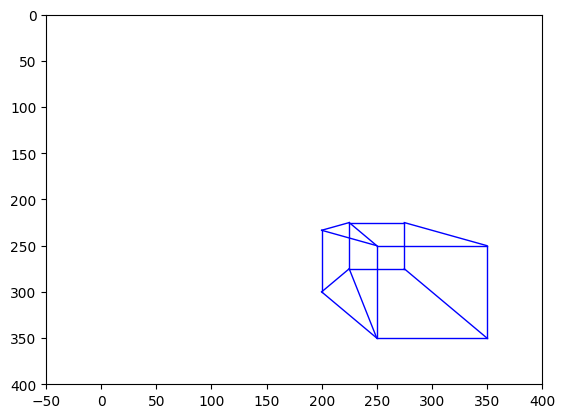

In [6]:
#PROBLEM 4

#simply undo the rotation in cTw by inputting the identity matrix, change the translation and run again to see new output.

cTw2 = np.array([
    [1, 0, 0, -2],
    [0, 1, 0, 2],
    [0, 0, 1, -3]
])

print(vertices)
projected_vertices = []
for vertex in vertices:
    print (vertex)
    P_c = np.dot(cTw2, vertex)
    print(P_c)  
    p = np.dot(K, P_c) 
    p /= p[2]  
    projected_vertices.append(p[:2]) 

projected_vertices = np.array(projected_vertices)

fig, ax = plt.subplots()
ax.set_xlim(-50, 400)
ax.set_ylim(0, 400)

edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  
    (4, 5), (5, 6), (6, 7), (7, 4),  
    (0, 4), (1, 5), (2, 6), (3, 7),   
    (1, 8), (5, 8), (2, 9), (6, 9), (8,9)
]

for edge in edges:
    line = Line2D(
        [projected_vertices[edge[0]][0], projected_vertices[edge[1]][0]],
        [projected_vertices[edge[0]][1], projected_vertices[edge[1]][1]],
        linewidth=1, color='blue'
    )
    ax.add_line(line)

plt.gca().invert_yaxis()  
plt.show()